# Homework Project 3.  Due November 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import eigsh
import hdbscan

### The attached file, 'polluteddeltas2.csv', contains the following data. 
### We took intraday price values for an asset, spanning a total of 45000 minutes.  This time series was then split into half-hour intervals for a total of 1500 intervals

In [2]:
# filename = 'polluteddeltas2.csv'
# f = open(filename,'r')
# csvf = csv.reader(f)
# polluteddeltalist = list(csvf)
# f.close() 
# plist = np.array(polluteddeltalist)
# polluteddata = plist.astype(float) 
# print(np.shape(polluteddata))

# simulating data of shape (1500, 31)

In [2]:
n, p = 1500, 30

X = np.random.normal(loc=0, scale=1, size=(n, p))

In [3]:
t1, t2 = 10, 30
X[t1:t2, :] = np.random.normal(loc=6, scale=1, size=(t2-t1, p))

In [4]:
c = X - X.mean(axis=0)
cov = (c.T @ c) / (n-1)

### There are 1500 lines in this file, one for each half-hour interval.  Each line begins with the count of the corresponding half-hour

In [6]:
# for t in range(3): #len(polluteddata[0,:])):
#     print('half-hour',t, 'data:',polluteddata[t,:]) 

### The data was constructed as follows for each half hour interval $t$.  Suppose that $p(t, k)$ denotes the price of the asset in minute $k$ of half-hour $t$.  Here $k = 0,1,\ldots, 29$.  
### The data in position $k+1$ of line $t$ of the file equals $p(t,k) - p(t,0)$, i.e. the change in price between minute $k$ and minute $0$.

### EXCEPT that:
### The data was <font color = "red">polluted</font> in a <font color = "red">significant and correlated</font> manner during a certain interval $[t_1, t_2]$ of half-hours.
### Your task is to identify this interval $[t_1, t_2]$ as closely as possible, using <font color = "red">covariance analysis techniques</font>.
### Please note that we are not interested in small, random noise.  We are looking for a large change in the covariance structure. 

In [5]:
vals, vecs = eigsh(cov, k=2, which='LA')
vals, vecs = vals[::-1], np.flip(vecs, axis=1)

In [6]:
Y = X.dot(vecs)

Clusters present (-1 is noise): {0, 1}


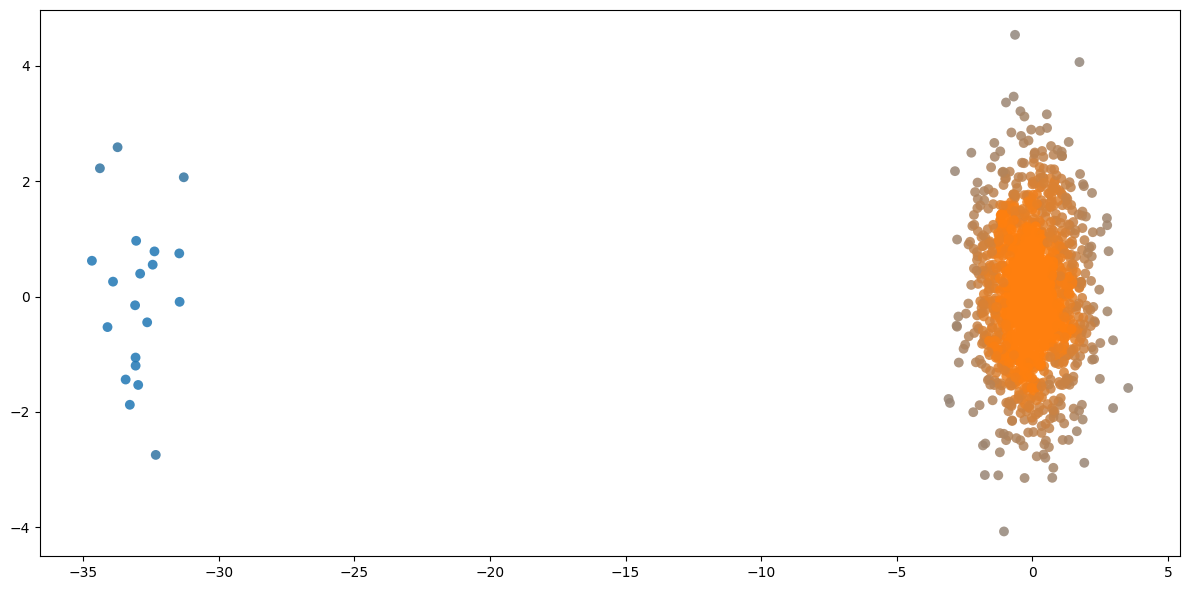

In [22]:
clust = hdbscan.HDBSCAN(min_cluster_size=15).fit(Y)
assgn, probs = clust.labels_, clust.probabilities_
unq_assgn = set(assgn)
print('Clusters present (-1 is noise):', unq_assgn)

color_palette = sns.color_palette('tab10', len(unq_assgn) - (1 if -1 in unq_assgn else 0))
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in assgn]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, probs)]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.scatter(x=Y[:, 0], y=Y[:, 1], c=cluster_member_colors, s=50, linewidth=0, alpha=0.85)

plt.tight_layout()
plt.show()

In [30]:
X[assgn == 0, :].mean()

6.018125105265328

In [31]:
X[assgn == 0, :].std()

1.0227974487584477